In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

Remove Dodgy

In [ ]:
import cv2
import imghdr

In [31]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/data'

In [32]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [33]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image /content/drive/MyDrive/Colab Notebooks/data/validasi/fertil
Issue with image /content/drive/MyDrive/Colab Notebooks/data/validasi/infertil
Issue with image /content/drive/MyDrive/Colab Notebooks/data/train/fertil
Issue with image /content/drive/MyDrive/Colab Notebooks/data/train/infertil


In [34]:
import numpy as np
from matplotlib import pyplot as plt

In [36]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/data')

Found 242 files belonging to 2 classes.


In [37]:
data_iterator = data.as_numpy_iterator()

In [38]:
batch = data_iterator.next()

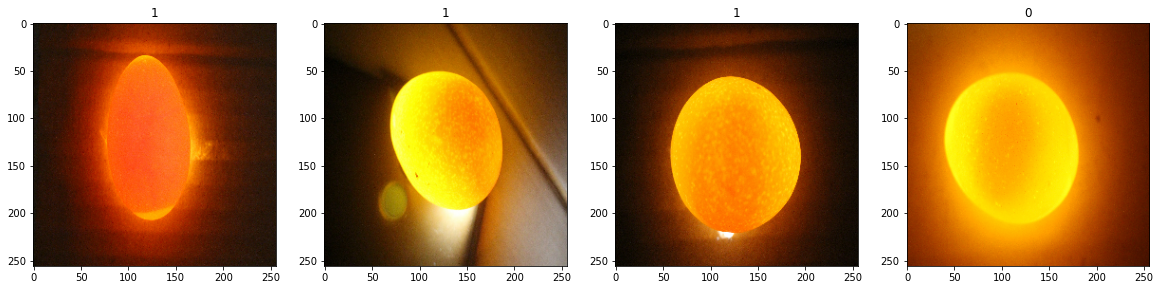

In [39]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scale Data

In [40]:
data = data.map(lambda x,y: (x/255, y))

In [41]:
data.as_numpy_iterator().next()

(array([[[[0.35784313, 0.2754902 , 0.20882353],
          [0.35882354, 0.2901961 , 0.19705883],
          [0.38333333, 0.29117647, 0.19705883],
          ...,
          [0.01372549, 0.00294118, 0.01568628],
          [0.00196078, 0.01862745, 0.        ],
          [0.00686275, 0.01078431, 0.        ]],
 
         [[0.37941176, 0.28921568, 0.23431373],
          [0.35882354, 0.27941176, 0.19803922],
          [0.37745097, 0.29705882, 0.20392157],
          ...,
          [0.01960784, 0.01862745, 0.01078431],
          [0.00490196, 0.00686275, 0.00098039],
          [0.        , 0.        , 0.        ]],
 
         [[0.37254903, 0.28235295, 0.21960784],
          [0.35      , 0.25196078, 0.16764706],
          [0.35784313, 0.2872549 , 0.19313726],
          ...,
          [0.0127451 , 0.00882353, 0.00098039],
          [0.01568628, 0.01078431, 0.00588235],
          [0.00392157, 0.00392157, 0.01176471]],
 
         ...,
 
         [[0.07058824, 0.03921569, 0.03137255],
          [0.07647

Split Data

In [42]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [43]:
train_size

5

In [44]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

BUilding the model

In [45]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [47]:
model = Sequential()

In [48]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [49]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

train

In [51]:
logdir='logs'

In [52]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [53]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 31s 5s/step - loss: 0.6493 - accuracy: 0.7063 - val_loss: 0.4955 - val_accuracy: 0.8438
Epoch 2/20
5/5 [==============================] - 26s 4s/step - loss: 0.6462 - accuracy: 0.6938 - val_loss: 0.7032 - val_accuracy: 0.5625
Epoch 3/20
5/5 [==============================] - 35s 6s/step - loss: 0.5976 - accuracy: 0.7000 - val_loss: 0.6269 - val_accuracy: 0.6562
Epoch 4/20
5/5 [==============================] - 36s 6s/step - loss: 0.5729 - accuracy: 0.7250 - val_loss: 0.4749 - val_accuracy: 0.7812
Epoch 5/20
5/5 [==============================] - 37s 6s/step - loss: 0.5287 - accuracy: 0.7500 - val_loss: 0.6802 - val_accuracy: 0.5312
Epoch 6/20
5/5 [==============================] - 27s 4s/step - loss: 0.5637 - accuracy: 0.7125 - val_loss: 0.4556 - val_accuracy: 0.7812
Epoch 7/20
5/5 [==============================] - 27s 4s/step - loss: 0.5146 - accuracy: 0.7500 - val_loss: 0.5689 - val_accuracy: 0.7188
Epoch 8/20
5/5 [==================

Plot Performance

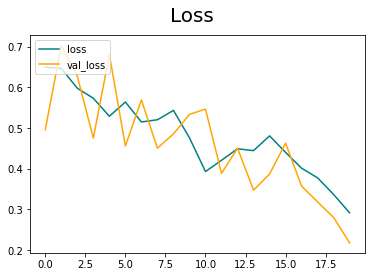

In [54]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

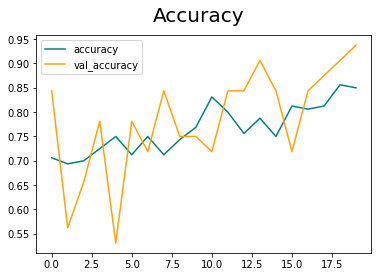

In [55]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluasi

In [56]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [57]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [58]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [59]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


Test

In [60]:
import cv2

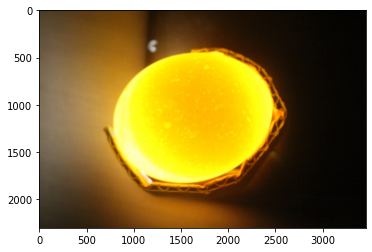

In [106]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/validasi/infertil/IMG_7734.JPG')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

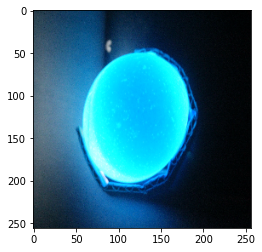

In [107]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [108]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 29ms/step


In [109]:
yhat

array([[6.6330436e-10]], dtype=float32)

In [110]:
if yhat > 0.5: 
    print(f'Predicted class is Fertil')
else:
    print(f'Predicted class is Infertil')

Predicted class is Infertil


Save the model

In [79]:
from tensorflow.keras.models import load_model

In [111]:
model.save(os.path.join('models','imageclassifier.h5'))

In [114]:
new_model = load_model('/content/drive/MyDrive/Colab Notebooks/models/imageclassifier.h5')

In [115]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 87ms/step


array([[6.6330436e-10]], dtype=float32)